1. Import required packages.
2. Load the data file
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [0]:
from google.colab import files

In [0]:
uploaded=files.upload()

Saving Washington County.xlsx to Washington County.xlsx


In [0]:
import io
df=pd.read_excel(io.BytesIO(uploaded['Washington County.xlsx']))
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,2 Ninigret Ave,Westerly,RI,2891,8500000,8.0,5.5,...,Active,NaN,NaN,https://www.redfin.com/RI/Westerly/2-Ninigret-...,RIS,1330544,N,Y,41.314558,-71.849397
1,MLS Listing,NaN,Single Family Residential,691 Q Succotash Rd,South Kingstown,RI,2879,359000,1.0,1.0,...,Active,NaN,NaN,https://www.redfin.com/RI/South-Kingstown/691Q...,RIS,1330116,N,Y,41.384345,-71.527036
2,MLS Listing,NaN,Single Family Residential,18 Mathewson St,Narragansett,RI,2882,2495000,6.0,5.0,...,Active,NaN,NaN,https://www.redfin.com/RI/Narragansett/18-Math...,RIS,1330583,N,Y,41.429789,-71.456768
3,MLS Listing,NaN,Single Family Residential,36 Crestwood Dr,South Kingstown,RI,2881,574900,3.0,2.0,...,Active,March-5-2023 12:00 PM,March-5-2023 02:00 PM,https://www.redfin.com/RI/Kingston/36-Crestwoo...,RIS,1329996,N,Y,41.476440,-71.533285
4,MLS Listing,NaN,Vacant Land,155 Dunns Corner Rd,Westerly,RI,2891,169000,NaN,NaN,...,Active,NaN,NaN,https://www.redfin.com/RI/Westerly/155-Dunns-C...,RIS,1330530,N,Y,41.375229,-71.763605


In [0]:
# Select only the required columns
df = df[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PROPERTY TYPE  230 non-null    object 
 1   PRICE          230 non-null    int64  
 2   BEDS           162 non-null    float64
 3   BATHS          162 non-null    float64
 4   SQUARE FEET    162 non-null    float64
 5   LOT SIZE       208 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.9+ KB


<AxesSubplot:>

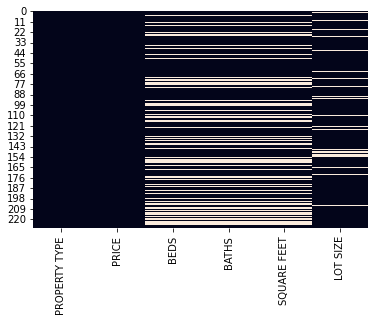

In [0]:
#  missing values using heatmamp
sns.heatmap(df.isnull(), cbar=False)

<AxesSubplot:>

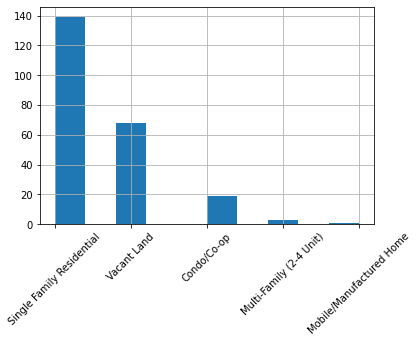

In [0]:
df['PROPERTY TYPE'].hist(xrot=45.0)

In [0]:
PROPERTY_TYPE_To_Remove={'Mobile/manufactured Home','Multi-Family (2.4 Unit)'}
df.drop(df[df['PROPERTY TYPE'].isin(PROPERTY_TYPE_To_Remove)].index, inplace= True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

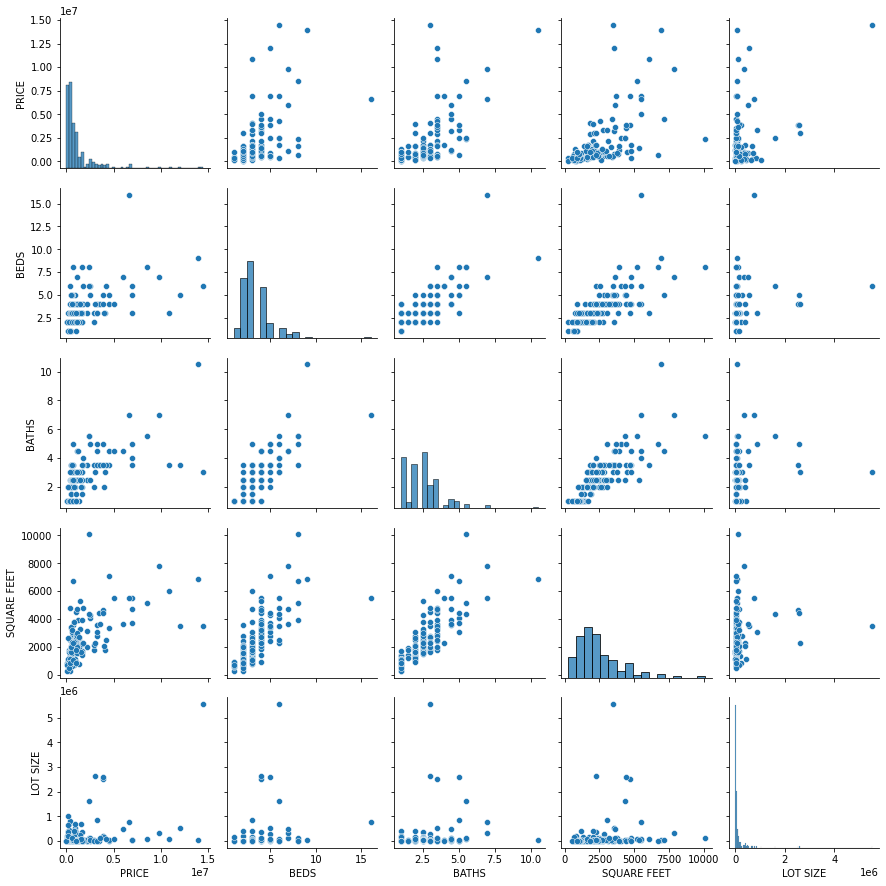

In [0]:
# Build pairplot
sns.pairplot(df)

In [0]:
# 1) There appears to be a linear relationship between PRICE and SQUARE FEET.
# 2) There is some heteroscedasticity, with larger variance for higher prices and larger square footage.
# 3) There are some outliers in the data, particularly for Lot Size  and  Square Feet. These may need to be excluded depending on the analysis being performed.

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [0]:
#Sumary
df.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,2.300000e+02,162.000000,162.000000,162.000000,2.080000e+02
mean,1.353450e+06,3.444444,2.561728,2401.864198,1.670111e+05
std,2.148478e+06,1.810940,1.376111,1575.198588,5.163200e+05
min,1.000000e+04,1.000000,1.000000,255.000000,2.500000e+03
25%,3.250000e+05,2.000000,2.000000,1356.000000,1.481000e+04
50%,6.045000e+05,3.000000,2.500000,2000.000000,3.627750e+04
75%,1.256000e+06,4.000000,3.000000,3027.000000,9.855450e+04
max,1.450000e+07,16.000000,10.500000,10077.000000,5.537347e+06


In [0]:
df.drop(df[df['SQUARE FEET']> 7500].index, inplace= True)
df.drop(df[df['SQUARE FEET']> 2*1e6].index, inplace= True)

In [0]:
imputed=df.fillna(df.mean())

In [0]:
imputed.describe()

In [0]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [0]:
Predictors=['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [0]:
X= pd.get_dummies(imputed[Predictors],drop_first=True)
Y= imputed['PRICE']

train_X, valid_X, train_Y, valid_Y= train_test_split(X, Y, test_size=0.3, random_state=1)

In [0]:
re_prices=LinearRegression()
re_prices.fit(train_X, train_Y)

In [0]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Mobile/Manufactured Home',
       'PROPERTY TYPE_Multi-Family (2-4 Unit)',
       'PROPERTY TYPE_Single Family Residential', 'PROPERTY TYPE_Vacant Land'],
      dtype='object')

In [0]:
re_prices.intercept_

-1684806.3600779271

In [0]:
re_prices.coef_

array([-1.02095743e+05,  7.89911844e+05,  4.32444533e+02,  1.64253892e+00,
        4.88748974e+05, -5.50844670e+05,  5.49242569e+05, -6.38450342e+05])

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [0]:
pred_Y=re_prices.predict(valid_X)

In [0]:
import math
print('Regression model performance evoluation' )
print('r2: ', r2_score(valid_Y, pred_Y))
print('MAE: ', mean_absolute_error(valid_Y, pred_Y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_Y, pred_Y)))
print('Max_error: ', max_error(valid_Y, pred_Y))



Regression model performance evoluation
r2:  0.3090698862882889
MAE:  895436.9302202939
RMSE:  1259647.3396685652
Max_error:  3766333.898818169


In [0]:
#Comments
#31% of variation in the price is explained  by the PROPERTY TYPE, BEDS, BATHS, SQUARE FEET, LOT SIZE.
#The MAE tells us the mean absolute difference between the predicted values and the actual values in a dataset
#The RMSE  tells us the average distance between the predicted values from the model and the actual values in the dataset.which is large in this case.
#Max_error is the absolute value of the most significant difference between a predicted variable and its real value. If the Maximum Error is much bigger than the RMSE, it might mean that the model has not correctly predicted outliers.But in our study the outliers have been dropped.
# The model is useful.